<center> <h1 style="color: #FF0000"> <FONT face="Times New Roman" size="5"> <u> Only with Validation task  </u> </FONT><center>

<left> <h1 style="color: #1E3EC6"> <FONT face="Times New Roman" size="5"> <u> Team : </u> </FONT><left>

• Amine ELKARI

• Ismail GHMIMAT

• Zakarya JOUHAFA

###### ------------------------------------------------------------------------------------------------------------------------

In [1]:
from numpy import *
from numpy.linalg import *
from scipy.integrate import *
from scipy.signal import *
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.pyplot import *
rcParams["figure.figsize"] = (10,6)


Chariot Model
==============

We consider a mobile robot of "chariot" type, evolving in the plane.
From above, its frame appears to be a disk of diameter $D$. It has two fixed wheels (their orientation does not change), which are parallel and located at opposite ends of the frame (hence separated by a distance of $D$) ;
these wheels have the common radius $R$.

The robot is symmetric with respect to the axis that joins the two wheels. For convenience, a green sticker is attached at the boundary of the frame on one side of this axis, on the robot axis of symmetry ; this side will is called the "front" of the robot, the point itself is called the "nose" of the robot. When we talk about the "left wheel" or the "right wheel", we assume that we are looking towards the front of the robot.

We will denote $(x, y)$ the coordinates of the wheel axis in the orthonormal frame $(0, e_x, e_y)$ of the plane. The angle $\theta$ refers to the angle of the wheels direction with respect to vector $e_x$ ; with
$\theta = 0$ when the front of the robot faces the right and $\theta = \pi/2$ when he faces the top.
We will denote $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the robot moves forward.

### Task - Parameter Definition


From now on, we assume that the frame diameter is $D = 1 \mbox{ m}$ and the wheel radius is $R = 10 \mbox{ cm}$.
Define the corresponding Python variables `D` and `R` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [2]:
D = 1
Rd = D/2
R = 0.1
theta = -0.57
x = 1
y = 1

In [3]:
def positionement(x,y,theta) :
   
  #for the right wheel :

    ##the coordinates:
    WR_1 = [x+Rd*np.sin(theta) + R*np.cos(theta), y - Rd*np.cos(theta)+R*np.sin(theta)]
    WR_2 = [x+Rd*np.sin(theta)-R*np.cos(theta), y - Rd*np.cos(theta)-R*np.sin(theta)]
   
    ##the values:
    x_WR_values = [WR_1[0], WR_2[0]]
    y_WR_values = [WR_1[1], WR_2[1]]
   
   
  #for the left wheel :

    ##the coordinates:
    WL_1 = [x-Rd*np.sin(theta) + R*np.cos(theta), y +Rd*np.cos(theta)+R*np.sin(theta)]
    WL_2 = [x-Rd*np.sin(theta)-R*np.cos(theta), y + Rd*np.cos(theta)-R*np.sin(theta)]
   
    ##the values:
    x_WL_values = [WL_1[0], WL_2[0]]
    y_WL_values = [WL_1[1], WL_2[1]]


    return(x_WR_values,y_WR_values,x_WL_values,y_WL_values)

### Task - Graphical Representation

Use `matplotlib` to draw an image of the robot in the plane for arbitrary values of $(x, y)$ and $\theta$. The frame will be represented as a circle, the wheels as lines and the nose as a green point.

<IPython.core.display.Javascript object>


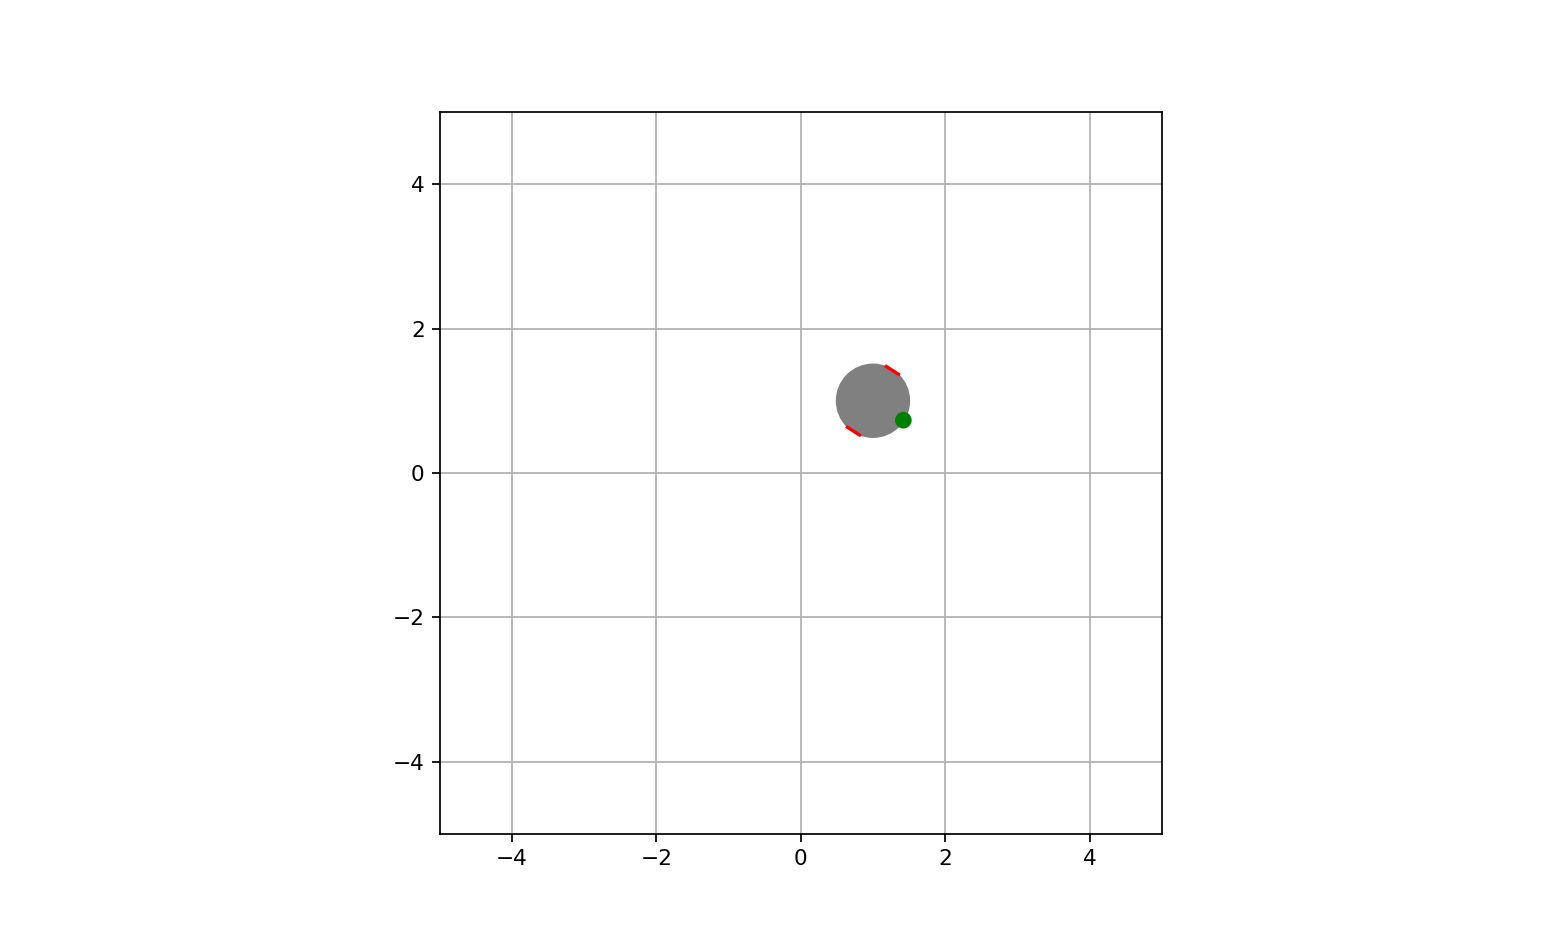

In [4]:
import matplotlib.pyplot as plt

figure()
axes = gca()
axes.axis([-5, 5, -5, 5])
axes.set_aspect(1)
grid(True)

#Getting values from positinoement function:
x_wr,y_wr,x_wl,y_wl = positionement(x,y,theta)

#Define the shape of the robot + the sticker:
disk_cercle = plt.Circle((x, y), D/2, color='gray')
sticker_cercle = plt.Circle((x+Rd*np.cos(theta), y + Rd*np.sin(theta)), 0.1, color='green')

#Add the plots to the same figure:
axes.add_artist(disk_cercle)
axes.add_artist(sticker_cercle)
plt.plot(x_wr, y_wr, color = 'r')
plt.plot(x_wl, y_wl, color = 'r')

### Task - Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the robot).
We also assume that the chariot wheels roll without slipping. 

Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

<left> <h1 style="color: #1E3EC6"> <FONT face="Times New Roman" size="2"> <u> Hypothése : </u> </FONT><left>

No lateral sliding. This simply means that the robot cannot move laterally in the local reference frame, which is mathematically translated into equation :


$\implies\dot{y_r} = 0$

$\dot{x} = v\cos(\theta)$ = $\dot{x}_r\cos(\theta)$ = $R.\frac{\dot{\phi_r}+\dot{\phi_l}}{2}\cos\theta$ = $R.\frac{\omega_r+\omega_l}{2}\cos\theta$

$\dot{y} = v\sin(\theta)$ = $\dot{x}_r\sin(\theta)$ = $R.\frac{\dot{\phi_r}+\dot{\phi_l}}{2}\sin\theta$ = $R.\frac{\omega_r+\omega_l}{2}\sin\theta$

$\omega = \dot{\theta} = \frac{\ V_r - \ V_l}{D} = R.\frac{\dot{\phi_r}-\dot{\phi_l}}{D} $

From these equations, the kinematic model of the two-wheel drive mobile robot can be represented as follows:

\begin{equation*}
\left (
\begin{bmatrix}
\dot{x}  \\
 \dot{y} \\
\dot{\theta} 
\end{bmatrix}  \right )= R \left( \begin{bmatrix} 
\frac{cos(\theta)}{2}  & \frac{cos(\theta)}{2}  \\
\frac{sin(\theta)}{2}  & \frac{sin(\theta)}{2}  \\
\frac{1}{d}  & \frac{-1}{d} 
\end{bmatrix}  \right) \left( \begin{bmatrix}
\omega_{R}  \\
\omega_{L} 
\end{bmatrix} \right)
\end{equation*}

### Task - Model Implementation

Implement a function `f` that computes $\dot{X} = (\dot{x}, \dot{y}, \dot{\theta})$ given $X = (x,y,\theta)$ 
and $\omega = (\omega_l, \omega_r)$.


In [5]:
def fun(t, X, omega):
    x, y, theta = X
    omega_l, omega_r = omega
    dx = R*(omega_r+omega_l)*np.cos(theta)/2
    dy = R*(omega_r+omega_l)*np.sin(theta)/2
    dtheta = R*(omega_r-omega_l)/D
    dX = array([dx, dy, dtheta])
    return dX

### Task - Simulation Setup

Show how the `solve_ivp` function can be used to solve the system dynamics on a span of 10 secs when:

  - $\omega$ is constant, equal to $\omega_0 = (\omega_{l0}, \omega_{r0})$ and
  
  - $X_0 = (x_0, y_0, \theta_0)$.
  
  

In [6]:
t_span = [0.0, 10]
X_0 = [0,0,0]
omega= [10,20]
result = solve_ivp(lambda t,X : fun(t,X,omega), t_span, X_0, max_step = 0.1)

r_t = result["t"]
x_1 = result["y"][0]
x_2 = result["y"][1]

<IPython.core.display.Javascript object>


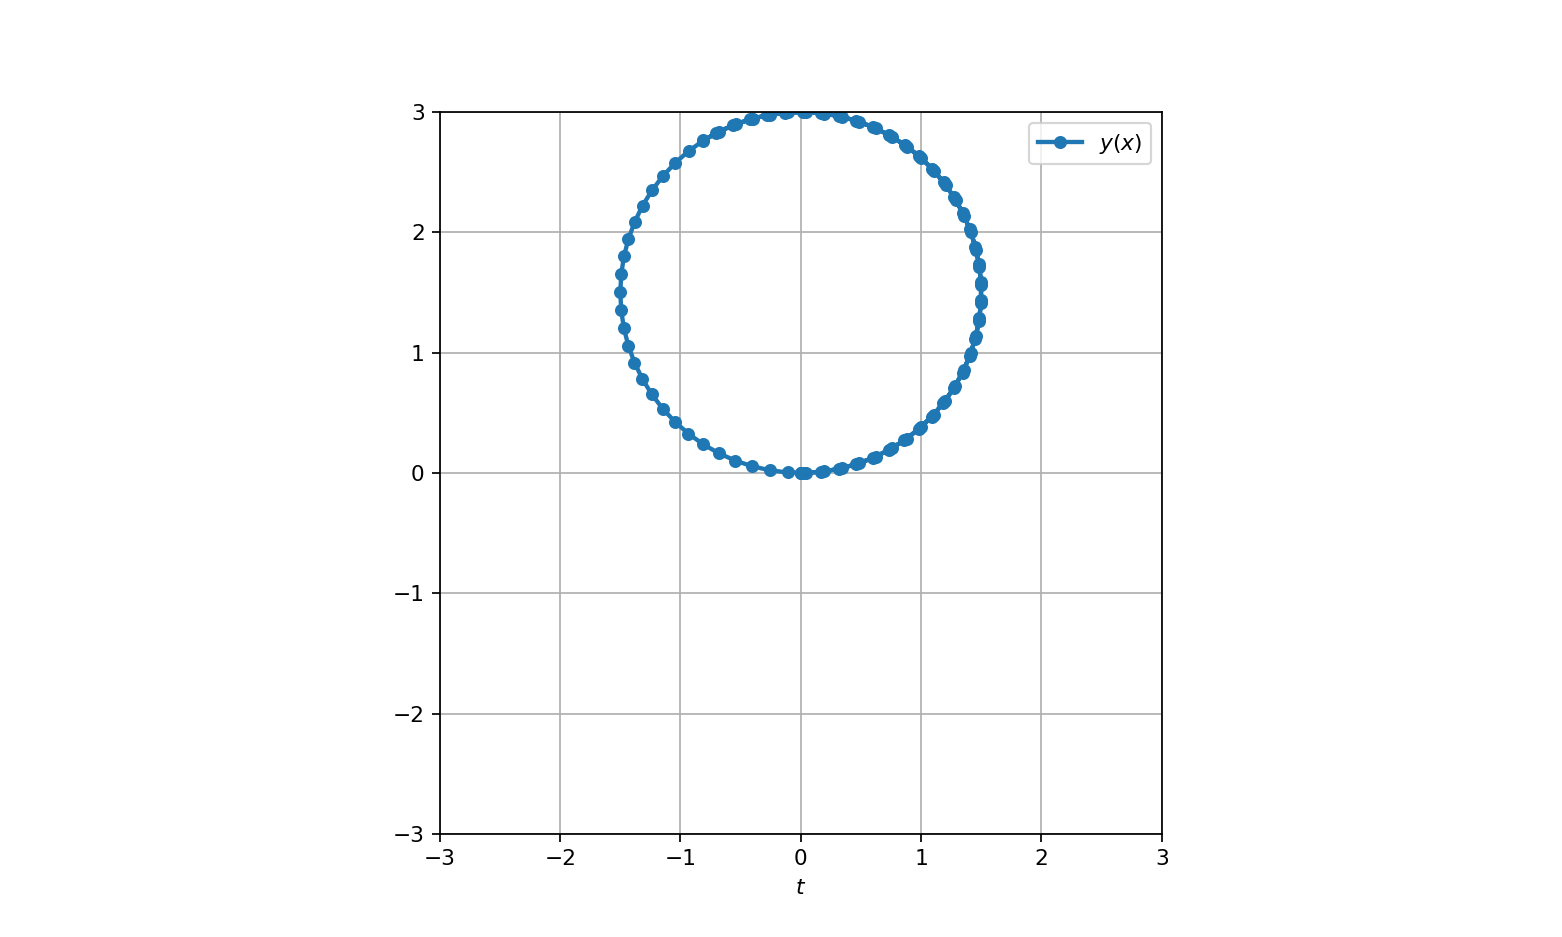

In [7]:
figure()
t = linspace(0, 10, 1000)
axes = gca()
axes.axis([-3, 3, -3, 3])
axes.set_aspect(1)
bold = {"lw": 2.0, "ms": 10.0}
plot(x_1, x_2, ".-", label="$y(x)$", **bold)
xlabel("$t$"); grid(); legend()

<IPython.core.display.Javascript object>


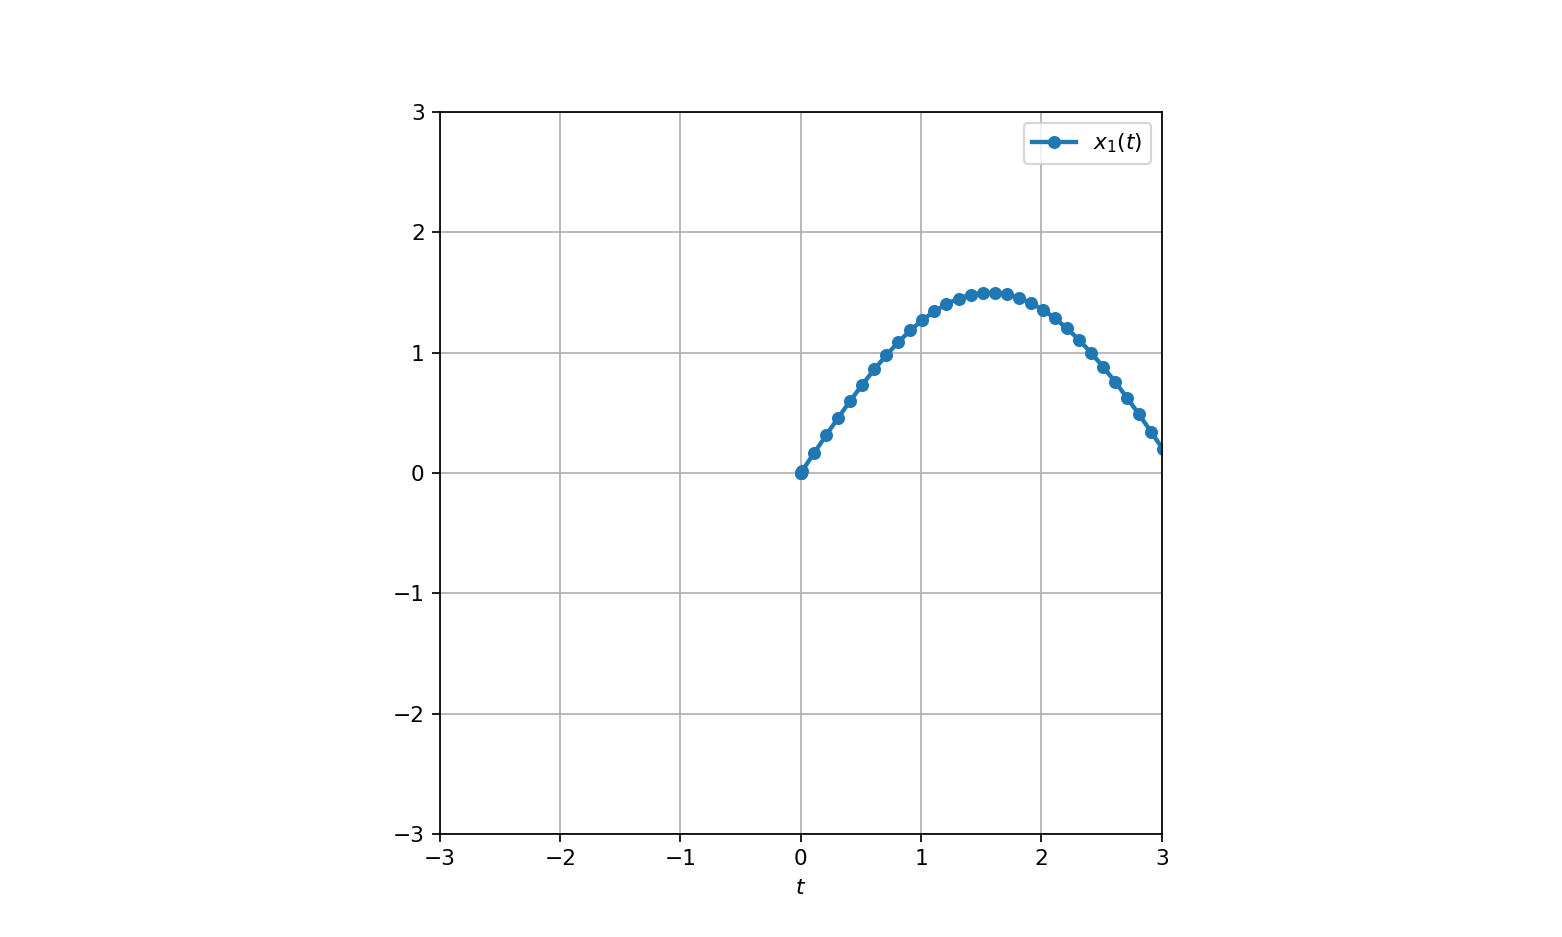

In [8]:
figure()
t = linspace(0, 10, 1000)
axes = gca()
axes.axis([-3, 3, -3, 3])
axes.set_aspect(1)
bold = {"lw": 2.0, "ms": 10.0}
plot(r_t, x_1, ".-", label="$x_1(t)$", **bold)
xlabel("$t$"); grid(); legend()

### Task: Simulation Validation
 
  
We would like to validate the results of our simulation code at this stage. 

To do this, select a few initials conditions $X_0$ and values of $\omega_0$ that are "as different as possible" (we want to check that our simulation of the dynamics works in all cases) for which the analytical solution is know. Compute these solutions, then, plot $x$, $y$ and $\theta$ as functions of the time $t$ and check that the result is consistent.

In [9]:
X_0 = [1.0, 0.0, 0.0]

def fun(t, X):
    x, y, theta = X
    omega_l, omega_r
    dx = R*(omega_r+omega_l)*np.cos(theta)/2
    dy = R*(omega_r+omega_l)*np.sin(theta)/2
    dtheta = R*(omega_r-omega_l)/D
    dX = array([dx, dy, dtheta])
    return dX

3 cases :
---------------------

### Case : $ \omega_{r}= \omega_{l}=1 $

<IPython.core.display.Javascript object>


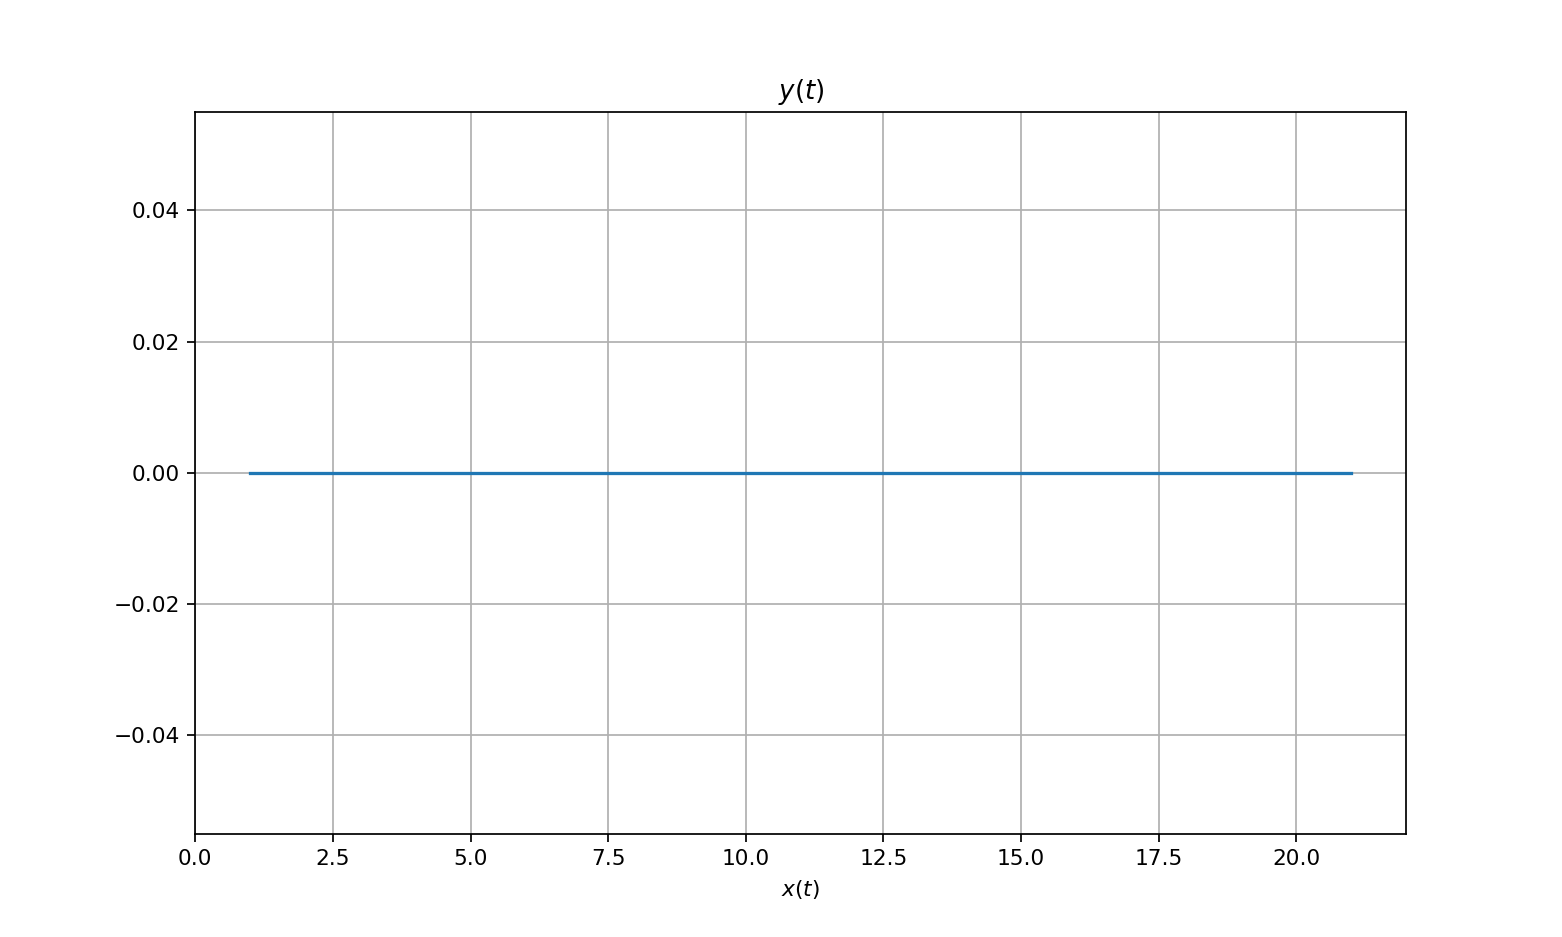

Text(0.5, 1.0, '$y(t)$')

In [10]:
R=1
omega_r=1
omega_l=1
D=1

result = solve_ivp(fun, [0.0, 20], X_0, dense_output=True, max_step=0.01)
figure()
t = linspace(0, 20, 1000)
x_t = result["sol"](t)[0]
y_t = result["sol"](t)[1]
theta_t = result["sol"](t)[2]
plot(x_t, y_t)
grid(True); xlabel("$x(t)$"); title("$y(t)$")

<IPython.core.display.Javascript object>


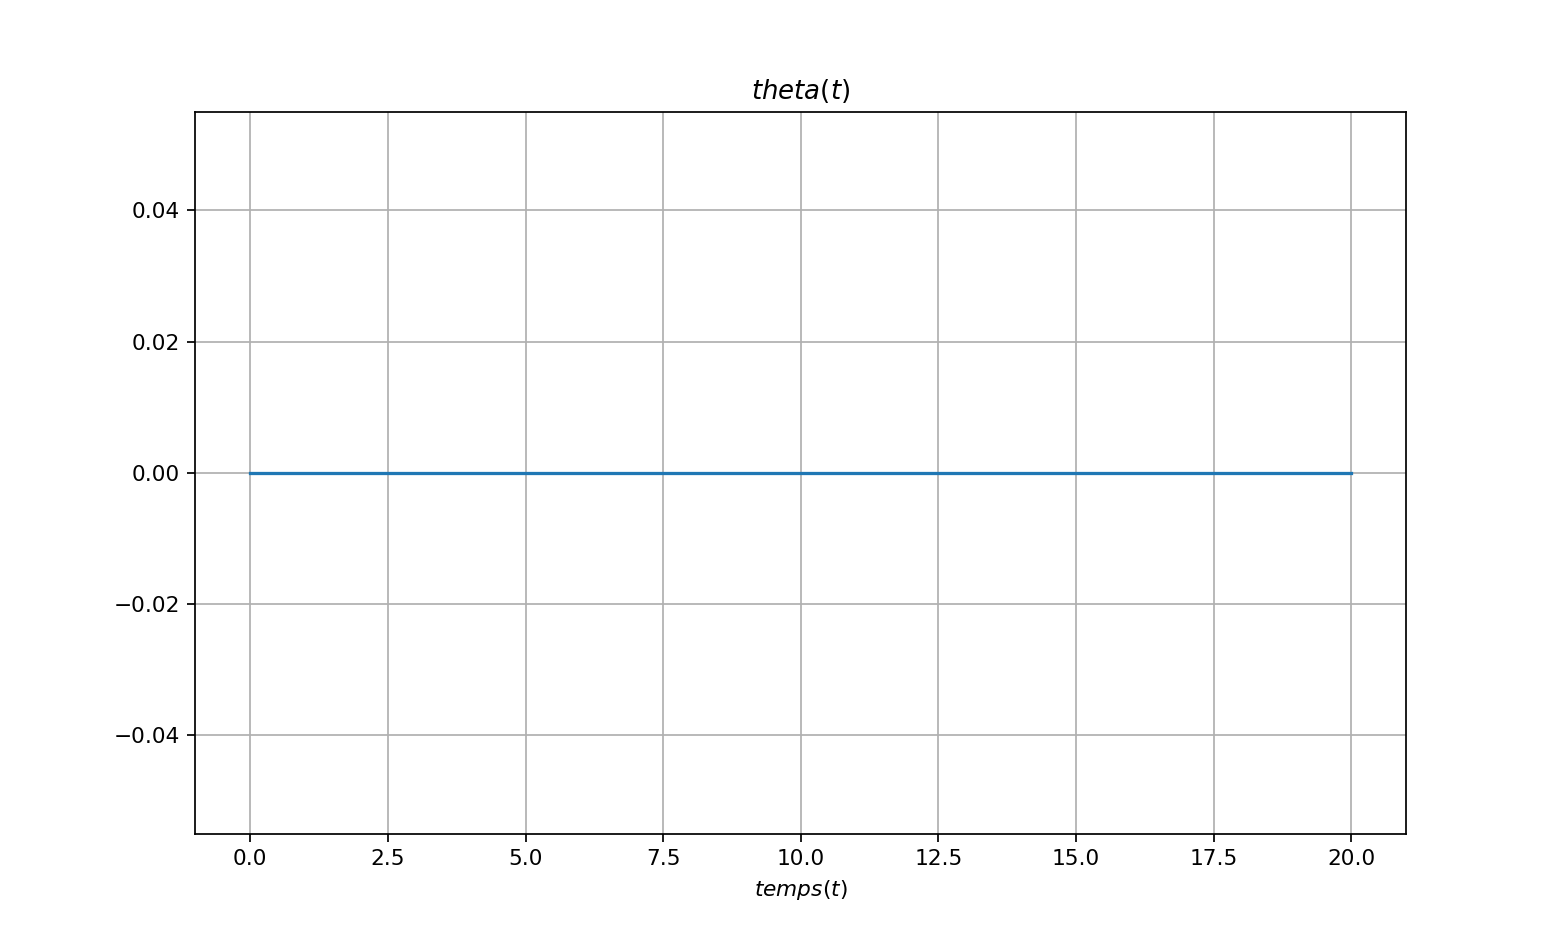

Text(0.5, 1.0, '$theta(t)$')

In [11]:
figure()
plot(t,theta_t)
grid(True); xlabel("$temps(t)$"); title("$theta(t)$")

### Case : $ \omega_{r}\ne\omega_{l} $

<IPython.core.display.Javascript object>


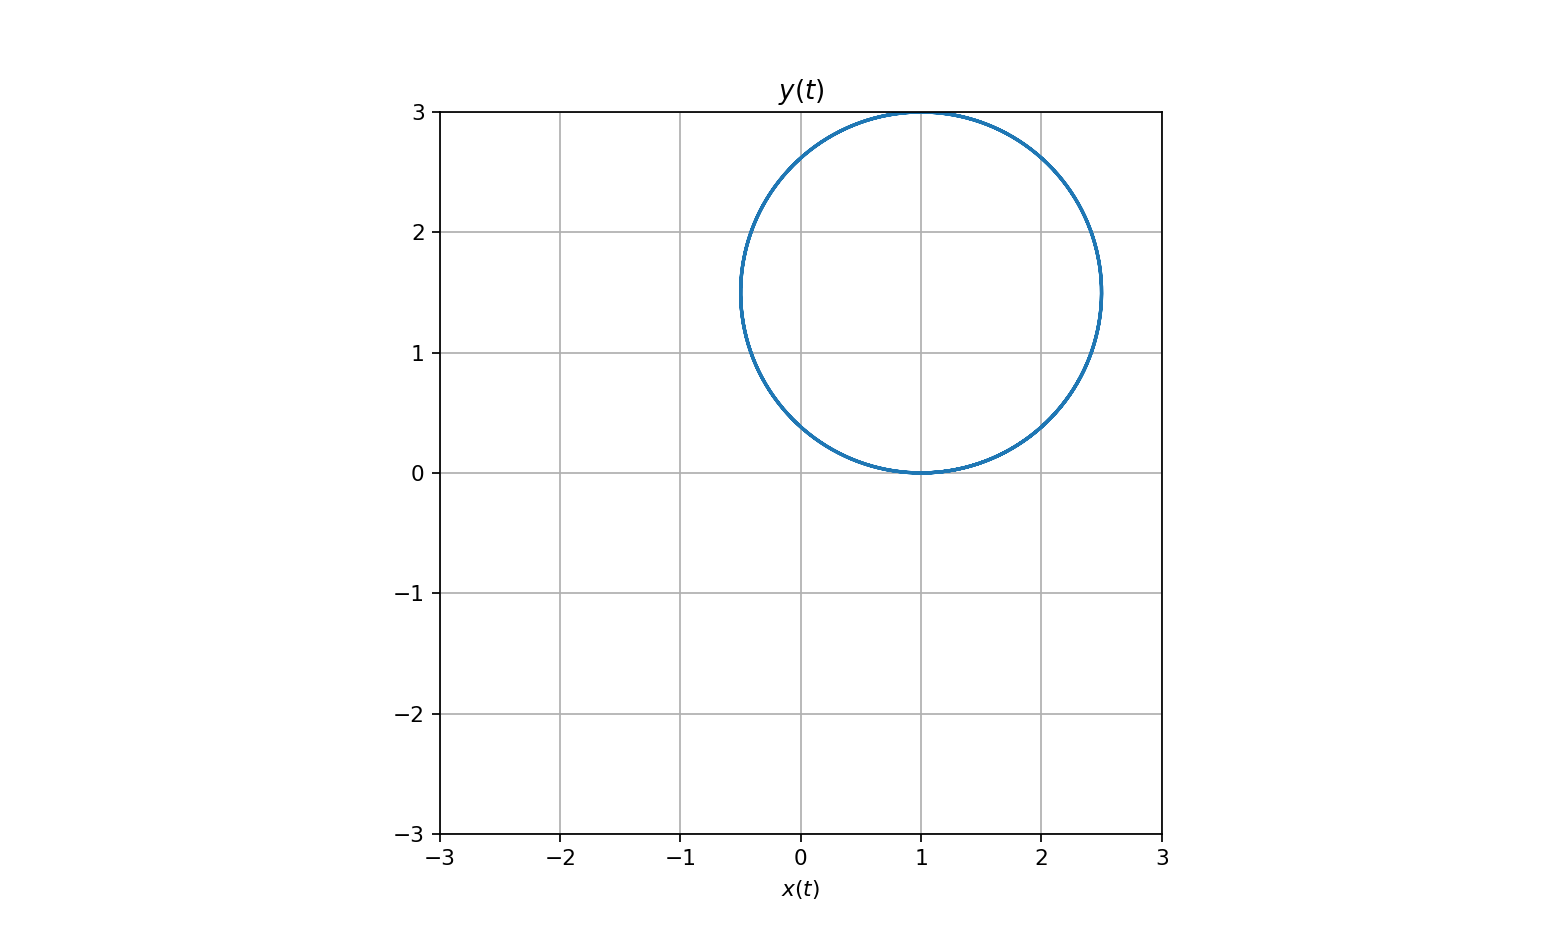

Text(0.5, 1.0, '$y(t)$')

In [12]:
R=1
omega_r=2
omega_l=1
D=1

result = solve_ivp(fun, [0.0, 20], X_0, dense_output=True, max_step=0.01)
figure()
axes = gca()
axes.axis([-3, 3, -3, 3])
axes.set_aspect(1)

t = linspace(0, 20, 1000)
x_t = result["sol"](t)[0]
y_t = result["sol"](t)[1]
theta_t = result["sol"](t)[2]
plot(x_t, y_t)
grid(True); xlabel("$x(t)$"); title("$y(t)$")

<IPython.core.display.Javascript object>


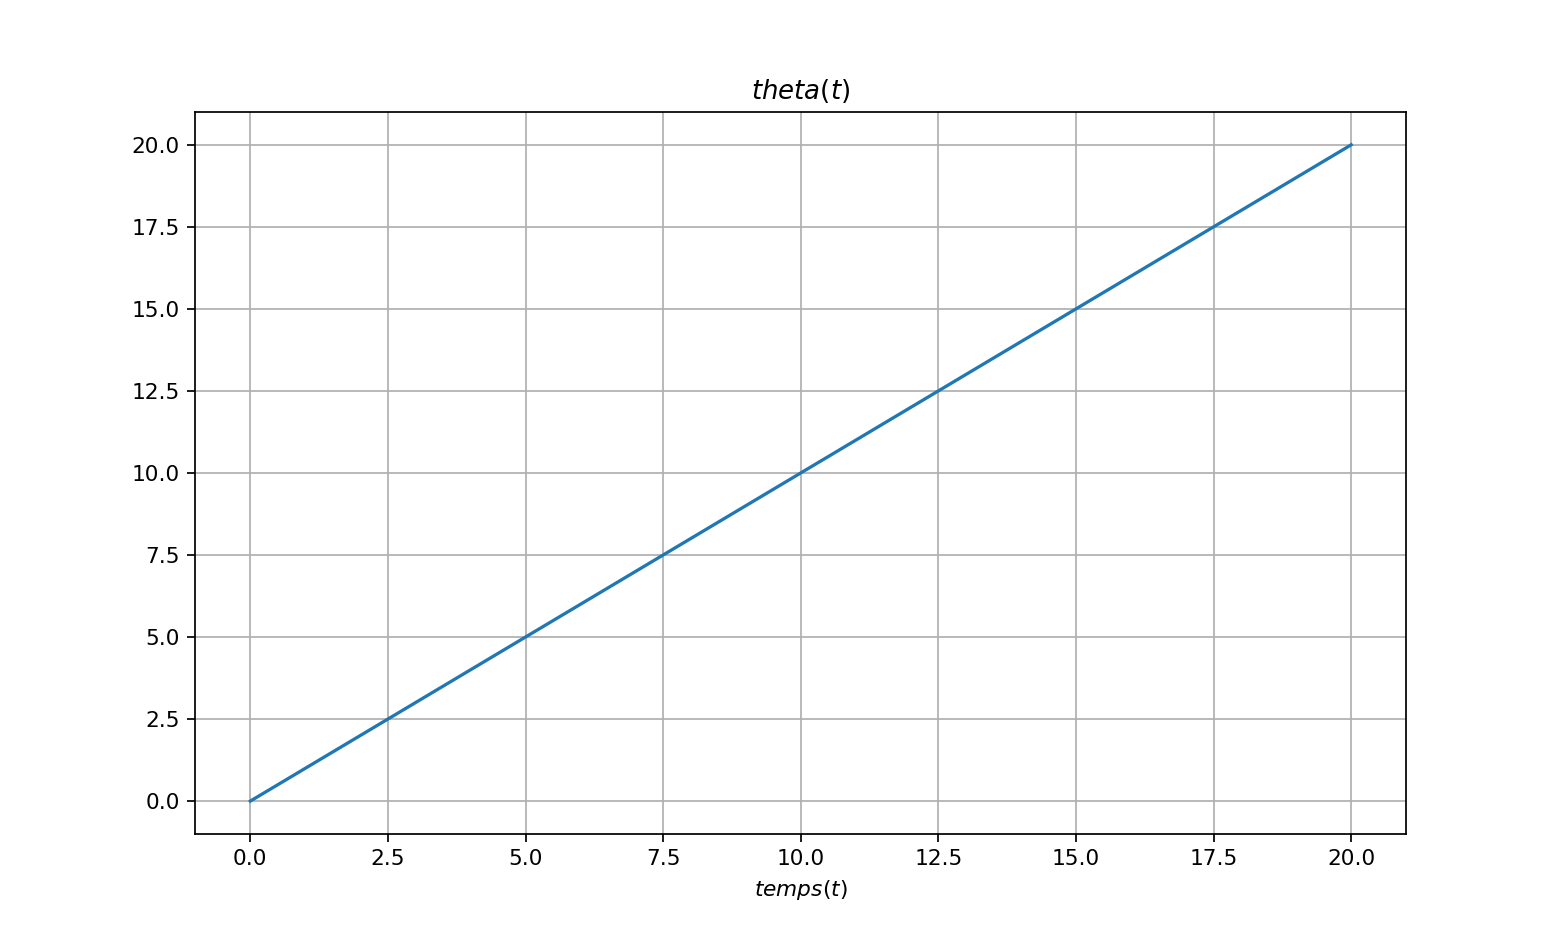

Text(0.5, 1.0, '$theta(t)$')

In [13]:
figure()
plot(t, theta_t)
grid(True); xlabel("$temps(t)$"); title("$theta(t)$")

### Cas : $ \omega_{r}=-\omega_{l}=1 $

<IPython.core.display.Javascript object>


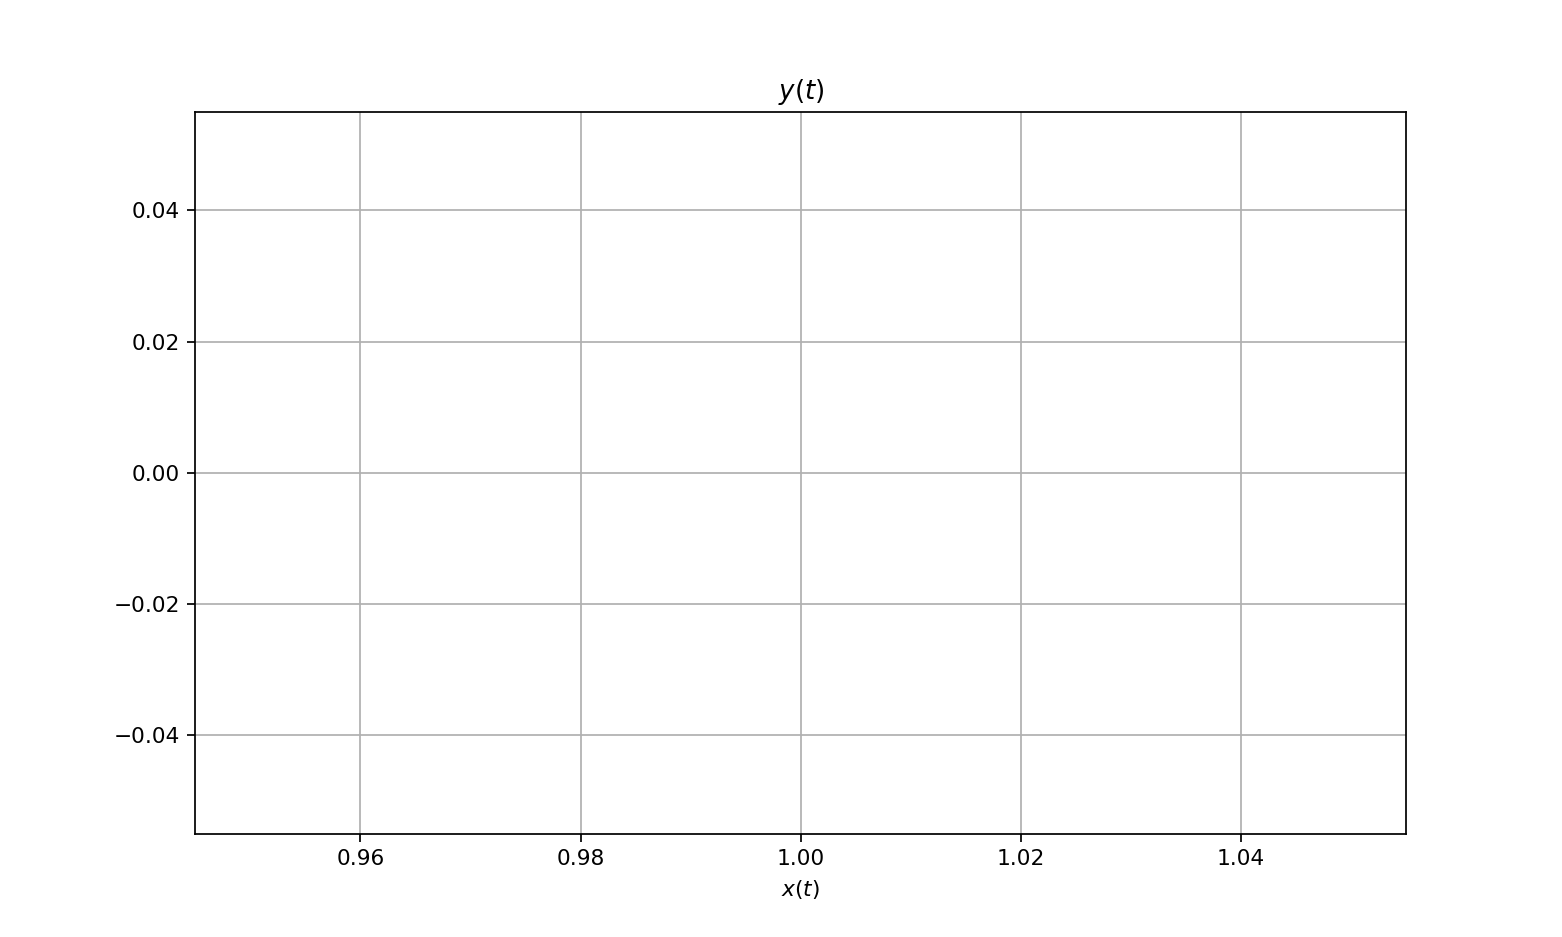

Text(0.5, 1.0, '$y(t)$')

In [14]:
R=1
omega_r=1
omega_l=-1
D=1

result = solve_ivp(fun, [0.0, 20], X_0, dense_output=True, max_step=0.01)
figure()
t = linspace(0, 20, 1000)
x_t = result["sol"](t)[0]
y_t = result["sol"](t)[1]
theta_t = result["sol"](t)[2]
plot(x_t, y_t)
grid(True); xlabel("$x(t)$"); title("$y(t)$")


<IPython.core.display.Javascript object>


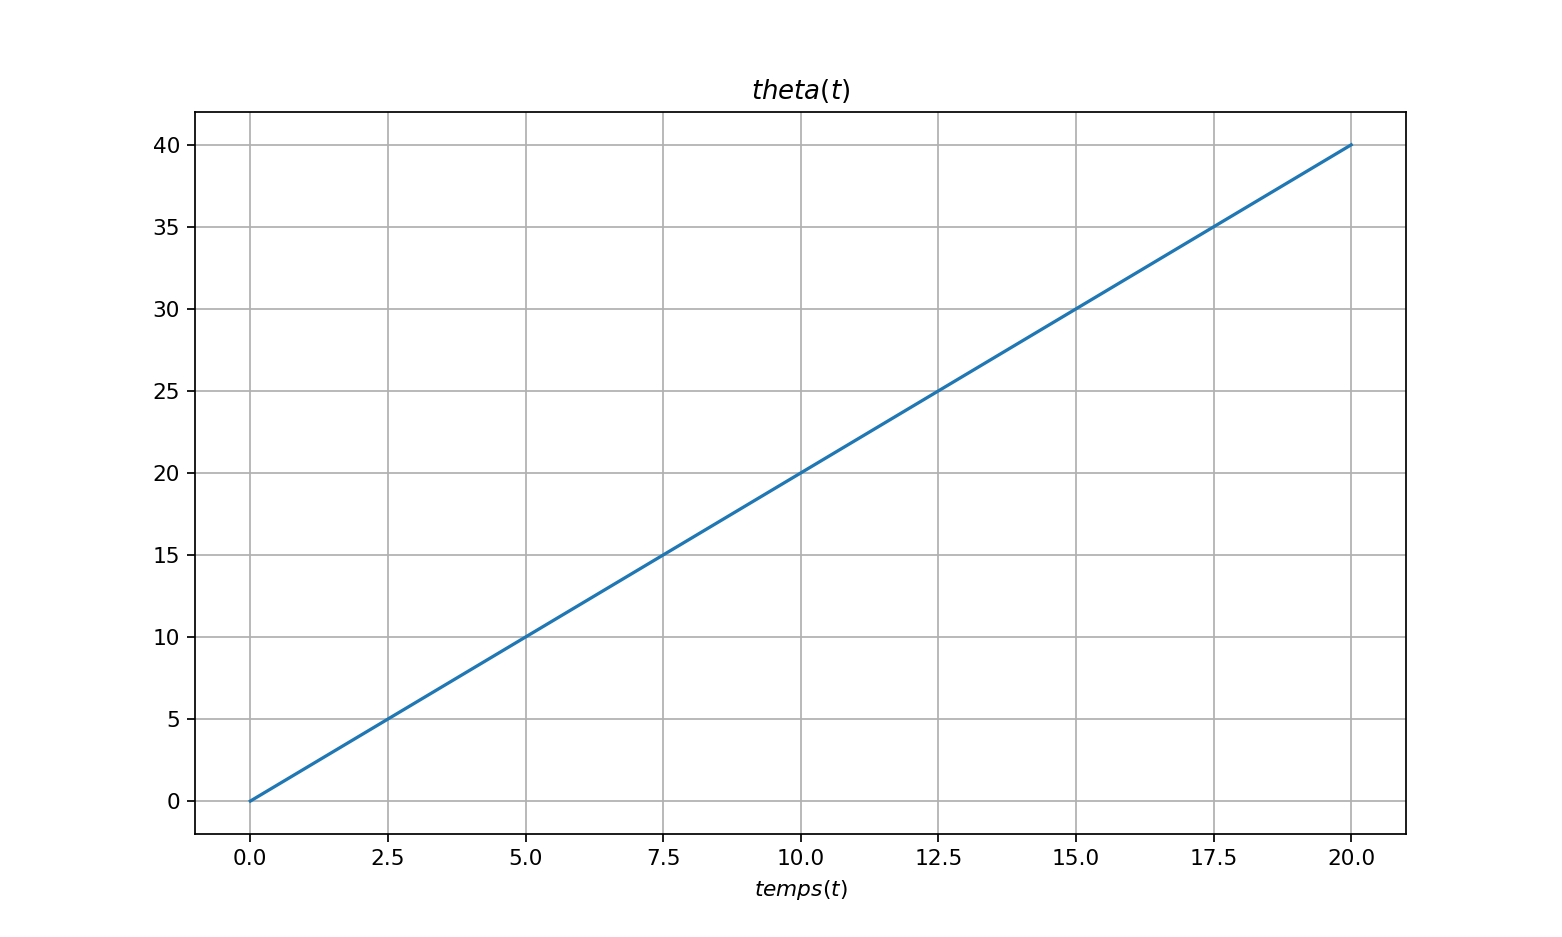

Text(0.5, 1.0, '$theta(t)$')

In [15]:
figure()
plot(t, theta_t)
grid(True); xlabel("$temps(t)$"); title("$theta(t)$")